# **Dependancies**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import *
from keras.callbacks import *
import os
from sklearn.preprocessing import MinMaxScaler

# **Loading Data**

In [0]:
PATH_TO_DATA = "/content/AAPL_data.csv"
data = pd.read_csv(PATH_TO_DATA)

In [0]:
open_data = data["open"].values

In [0]:
open_data = open_data.reshape(-1,1)

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
open_data = scaler.fit_transform(open_data)

In [0]:
open_data.shape
data_train = open_data[:1001]
data_test = open_data[975:]

In [0]:
#Creating X_test and Y_Test tensors
x_train = []
y_train = []

for i in range(50,1001):
  x_train.append(data_train[i-50:i])
  y_train.append(data_train[i])
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [0]:
#Creating X_test and Y_Test tensors
x_test = []
y_test = []

for i in range(50,data_test.shape[0]):
  x_test.append(data_test[i-50:i])
  y_test.append(data_test[i])
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

# **Model Architecture + Training**

In [0]:
model = Sequential([
  layers.LSTM(units=96, return_sequences=True, input_shape=(50,1)),
  layers.Dropout(0.2),
  layers.LSTM(units=96, return_sequences=True),
  layers.Dropout(0.2),
  layers.LSTM(units=96, return_sequences=True),
  layers.Dropout(0.2),
  layers.LSTM(units=96, return_sequences=True),
  layers.Dropout(0.2),
  layers.LSTM(units=96, return_sequences=True),
  layers.Dropout(0.2),
  layers.LSTM(units=96),
  layers.Dropout(0.2),
  layers.Dense(1)
])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss="mean_squared_error", optimizer="adam")

In [0]:
mcp_save = ModelCheckpoint('mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

In [0]:
model.fit(x_train,y_train, epochs=100, batch_size=32, validation_split=0.15, callbacks=[mcp_save,earlyStopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 808 samples, validate on 143 samples
Epoch 1/100





808/808 [==============================] - 14s 18ms/step - loss: 0.0473 - val_loss: 0.0065
Epoch 2/100
808/808 [==============================] - 10s 12ms/step - loss: 0.0109 - val_loss: 0.0016
Epoch 3/100
808/808 [==============================] - 10s 12ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 4/100
808/808 [==============================] - 9s 12ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 5/100
808/808 [==============================] - 10s 12ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 6/100
808/808 [==============================] - 10s 12ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 7/100
808/808 [==============================] - 9s 12ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 8/100
808/808 [==============================] - 10s 12ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 9/100
808/808 [=========

# **Testing Model**

In [0]:
from tensorflow.keras.models import load_model
prediction_model = load_model('/content/mdl_wts.hdf5')

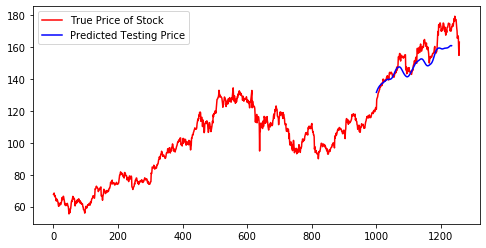

In [0]:
predictions = prediction_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
open_data = scaler.inverse_transform(open_data)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(open_data, color="red", label="True Price of Stock")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()